In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv(r'/content/movies.csv')
ratings = pd.read_csv(r'/content/ratings.csv')
links = pd.read_csv(r'/content/links.csv')
tags = pd.read_csv(r'/content/tags.csv')

#Task 1

In [4]:
movies.shape

(9742, 3)

In [5]:
ratings.shape

(100836, 4)

In [6]:
for column in ratings.columns:
  print(column, ratings[column].nunique())

userId 610
movieId 9724
rating 10
timestamp 85043


In [7]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
print(movies[movies['title'] == 'Matrix, The (1999)'])
matrix_movie=tags[tags['movieId'] == 2571]

      movieId               title                  genres
1939     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller


In [14]:
print("******The Matrix (1999)******")
idx = 1
for tags in list(set(matrix_movie['tag'])):
  print(str(idx)+' '+tags)
  idx += 1
print("*****************************")

******The Matrix (1999)******
1 alternate universe
2 philosophy
3 martial arts
4 sci-fi
5 post apocalyptic
*****************************


In [22]:
merged_data = pd.merge(ratings, movies, on='movieId')
ans = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']

avg_rating = round(np.mean(ans['rating']),2)

print("Average rating:" + str(avg_rating))

Average rating:3.97


In [23]:
fight_club_ratings = merged_data.loc[merged_data['title'] == 'Fight Club (1999)','rating']

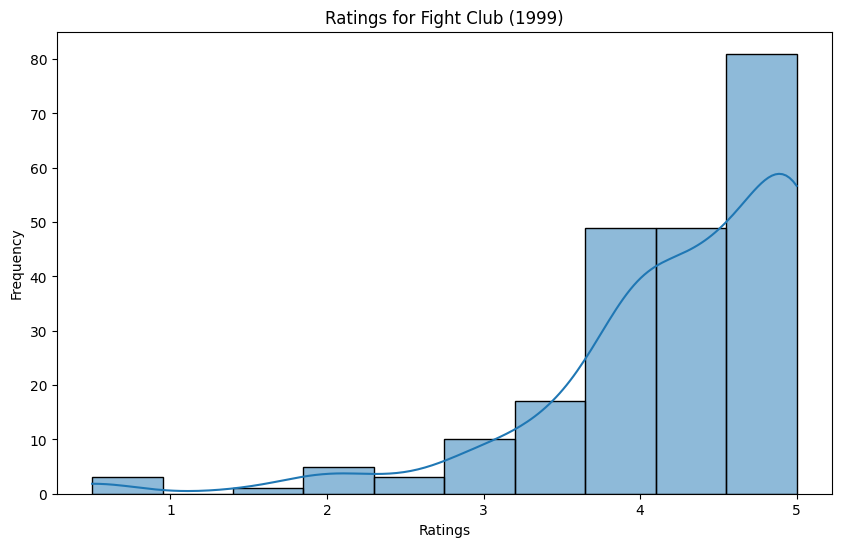

In [24]:
# Plot the data distribution
plt.figure(figsize=(10,6))
sns.histplot(fight_club_ratings, bins=10, kde=True)
plt.title("Ratings for Fight Club (1999)")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

#Task 2

In [25]:
# Find the movies with the maximum ratings
average_ratings = merged_data.groupby('title')['rating'].mean()
sorted_movies = average_ratings.sort_values(ascending=False)
top_five_movies = sorted_movies.head(5)
top_five_movies

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [26]:
merged_data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [27]:
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [28]:
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

In [29]:
joined_data = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

In [30]:
popular_movies = joined_data[joined_data['rating_count'] > 50]

In [31]:
popular_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [32]:
average_ratings = popular_movies.groupby('title')['rating_mean'].mean()
sorted_movies = average_ratings.sort_values(ascending=False)
top_five_movies = sorted_movies.head(5)
top_five_movies

,rating_mean
title,
"Shawshank Redemption, The (1994)",4.429022
"Godfather, The (1972)",4.289062
Fight Club (1999),4.272936
Cool Hand Luke (1967),4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041


In [37]:
total_ratings = popular_movies.groupby('title')['rating_count'].mean()
sorted_movies = total_ratings.sort_values(ascending=False)
top_five_movies = sorted_movies.head(5)
print('*************Top 5 movies**********************')
print(top_five_movies)
print('***********************************************')

*************Top 5 movies**********************
title
Forrest Gump (1994)                 329.0
Shawshank Redemption, The (1994)    317.0
Pulp Fiction (1994)                 307.0
Silence of the Lambs, The (1991)    279.0
Matrix, The (1999)                  278.0
Name: rating_count, dtype: float64
***********************************************


In [38]:
# Find out the Third most populat=r based on the number of ratings
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

In [39]:
sci_fi_ratings = sci_fi_movies.groupby('movieId')['rating'].count().reset_index()
sorted_sci_fi_movies = sci_fi_ratings.sort_values(by='rating', ascending=False)

In [40]:
third_popular_movie_id = sorted_sci_fi_movies.iloc[2]['movieId']

third_popular_movie = movies[movies['movieId'] == third_popular_movie_id]

third_popular_movie

,movieId,title,genres
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


In [ ]:
most_popular_movie_id = sorted_sci_fi_movies.iloc[0]['movieId']

most_popular_movie = movies[movies['movieId'] == most_popular_movie_id]

most_popular_movie

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [ ]:
# Find out the Third most populat=r based on the number of ratings
#popular_movies = merged_data[merged_data['genres']]

popular_ratings = merged_data.groupby('movieId')['rating'].count().reset_index()
sorted_movies = popular_ratings.sort_values(by='rating', ascending=False)

most_popular_m_id = sorted_movies.iloc[0]['movieId']

most_popular_m = movies[movies['movieId'] == most_popular_m_id]

most_popular_m

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


#Web scraping

In [41]:
!pip install beautifulsoup4

In [42]:
from bs4 import BeautifulSoup
import requests

In [44]:
def scraper(imdb_ids):
  data = []

  for id in imdb_ids:
    id_str = str(int(id)).zfill(7)
    URL = f"https://www.imdb.com/title/tt{id_str}/reviews"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser')

      # Extract reviews
      reviews = soup.find_all('div', class_='text show-more__control')
      reviews_text = [review.get_text(strip=True) for review in reviews]

      #Collect the data
      data.append({'IMDB_ID':id, 'Reviews':reviews_text})
    else:
      print("Error occurred")
  return pd.DataFrame(data)

# imdb_list = links['imdbId'].tolist()
# reviews_df = scraper(imdb_list[:20])
# print(reviews_df)
#print(imdb_list)

In [46]:
def scrapper(imdbId):
    """Scrapes the IMDB rating for a given movie ID.

    Args:
        imdbId (int): The IMDB ID of the movie.

    Returns:
        str or np.nan: The extracted IMDB rating as a string, or np.nan if not found.

    Raises:
        Exception: If an unexpected error occurs during scraping.
    """

    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    # Improved headers with more details
    request_headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br',
        # Consider adding additional headers like 'Referer' to mimic user behavior
    }

    try:
        response = requests.get(URL, headers=request_headers)
        response.raise_for_status()  # Raise an exception for non-200 status codes

        soup = BeautifulSoup(response.content, 'html.parser')
        imdb_rating = soup.find('span', class_='rating-other-user-rating')  # Improved selector

        return imdb_rating.text if imdb_rating else np.nan
    except requests.exceptions.RequestException as e:
        print(f"Error scraping IMDB rating: {e}")
        return np.nan
    except Exception as e:
        print(f"Unexpected error: {e}")
        return np.nan

In [48]:
imdb_list = links['imdbId'].tolist()
reviews_df = scraper(imdb_list[:50])
print(reviews_df)

    IMDB_ID                                            Reviews
0    114709  [I am a big fan of the animated movies coming ...
1    113497  [I have not seen this movie in more then a dec...
2    113228  [Some people see this as an inferior sequel to...
3    114885  [I got an opportunity to see Waiting To Exhale...
4    113041  [As much as I want to rag this movie, make fun...
5    113277  [I have very little interest in most action fi...
6    114319  [Although terribly predictable and a bit too l...
7    112302  [Spoiler warning!This is a mixed-bag when it c...
8    114576  [I found this to be a very interesting action ...
9    113189  [This was Pierce Brosnan's first outing as Bon...
10   112346  [Aaron Sorkin sets a snappy pace for this clas...
11   112896  [I remember being an 11 year old boy in stitch...
12   112453  [This film has a seriousness and drama to it t...
13   113987  [In an overall solid cast, Anthony Hopkins shi...
14   112760  ["Cutthroat Island" is a 1995 film with ch

###"The movieId of the movie which has the highest IMDB rating."

In [51]:
# Merge the datasets on the 'movieId' column
new_data = pd.merge(movies, ratings, on='movieId')

# Group by movieId and calculate the average rating
average_ratings = new_data.groupby('movieId')['rating'].mean().reset_index(name='average_rating')

# Find the movie with the highest average rating
highest_rated_movie = average_ratings.sort_values(by='average_rating', ascending=False).head(1)

# Extract the movieId of the highest-rated movie
movie_id = highest_rated_movie['movieId'].values[0]

print("Movie with the highest average rating:")
print(movie_id)

Movie with the highest average rating:
88448


###"The movieId of the "Sci-Fi" movie which has the highest IMDB rating."

In [52]:
# Merge the datasets
_data = pd.merge(movies, ratings, on='movieId')

# Filter for Sci-Fi movies
sci_fi_movies = _data[_data['genres'].str.contains('Sci-Fi')]

# Calculate average ratings for Sci-Fi movies
average_ratings = sci_fi_movies.groupby('movieId')['rating'].mean().reset_index(name='average_rating')

# Find the movie with the highest average rating
highest_rated_sci_fi_movie = average_ratings.sort_values(by='average_rating', ascending=False).head(1)

# Extract the movie ID
movie_id = highest_rated_sci_fi_movie['movieId'].values[0]

print("Movie ID of the Sci-Fi movie with the highest IMDB rating:")
print(movie_id)

Movie ID of the Sci-Fi movie with the highest IMDB rating:
94810
